<a href="https://colab.research.google.com/github/NazraJN/Suicide_rates/blob/main/Suicide_rates_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Suicide rates analysis**

## Overview

According to the World Health Organization (WHO), suicide is a significant global public health issue, accounting for more than 1 in every 100 deaths worldwide. The WHO estimates that approximately 800,000 people die by suicide annually, with around 80% of these suicides occurring in low and middle-income countries. A concerning trend is that the global suicide rate is more than twice as high among men as it is among women.

Suicide affects all nations and is influenced by factors like mental disorders, depression rates, and overall life satisfaction. Recognizing the need for comprehensive strategies to address this preventable cause of death, the reduction of suicide mortality is a key priority for the WHO. This priority is reflected in the shared goal of the United Nations Sustainable Development Goals (SDGs) and the WHOs Comprehensive Mental Health Action Plan 2013-2023 to reduce the global suicide mortality rate by one third by 2030. This underscores the importance of mental health promotion and suicide prevention efforts as integral components of public health initiatives worldwide.

## Problem statement


Despite its profound impact, suicide prevention efforts have not received the same level of attention and resources as other global health issues. To address this gap, a comprehensive understanding of the factors influencing suicide rates is crucial. This project aims to conduct a comprehensive analysis of global suicide rates between 1950 to 2005, focusing on identifying key determinants and patterns within that period. By exploring the relationships between various socio-economic, demographic, and environmental factors, this research seeks to provide insights that can inform targeted interventions and policies to reduce the incidence of suicide today.

Stakeholders interested in mental health promotion and suicide prevention efforts, including policymakers, public health officials, mental health organizations, and researchers, can benefit from the findings of this project.

## Objectives

1. To examine the trend in global suicide rates between 1950 to 2005
2. To compare variations in suicide rates by country
3. To compare variations in suicide rates by gender

## Data understanding

The dataset used in this project is sourced from the World Health Organization. It provides information on age-adjusted suicide rates among males and females from 1950 to 2005.

The dataset includes the following features:

* **Entity**: The name of the country or region.
* **Year**: The year of the recorded data.
* **Male suicide rates for selected countries, 1950-2005 (WHO (2005))**: Age-adjusted male suicide rates per 100,000 population for selected countries.
* **Female suicide rates for selected countries, 1950-2005 (WHO (2005))**: Age-adjusted female suicide rates per 100,000 population for selected countries

In [ ]:
# import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [ ]:
# load the datasets
female_suicide_rates = pd.read_csv('Age_adjusted_female_suicide_rates.csv')
male_suicide_rates = pd.read_csv('Age_adjusted_male_suicide_rates.csv')

In [ ]:
with open('datapackage.json') as f:
   data = json.load(f)
data

{'name': 'Age-adjusted male suicide rates, 1950-2005 - WHO (2005)',
 'title': 'Age-adjusted male suicide rates, 1950-2005 - WHO (2005)',
 'id': 21,
 'description': 'Age-adjusted suicide rates',
 'sources': [{'name': 'World Health Organization (2005)',
   'dataPublishedBy': 'Gapminder using data from (i) WHO Violence and Injury Prevention (VIP) and (ii) WHO Global Burden of Disease 2002 and 2004.',
   'dataPublisherSource': None,
   'link': 'http://spreadsheets.google.com/pub?key=troMumuI0Y6Phpwnj6qXa_A&output=xls',
   'retrievedDate': None,
   'additionalInfo': 'Age-adjusted suicide rates'}],
 'owidTags': ['Suicides'],
 'resources': [{'path': 'Age-adjusted male suicide rates, 1950-2005 - WHO (2005).csv',
   'schema': {'fields': [{'name': 'Entity', 'type': 'string'},
     {'name': 'Year', 'type': 'year'},
     {'name': 'Male suicide rates for selected countries, 1950-2005 (WHO (2005))',
      'type': 'any',
      'description': '',
      'owidDisplaySettings': {'unit': 'age-adjusted mal

Before delving into the analysis of the datasets, preliminary exploration of each dataset individually is important to provide a comprehensive understanding of the data's contents, structure, and key features.

### Female suicide rates

In [ ]:
# preview first 10 rows
female_suicide_rates.head(10)

,Entity,Year,"Female suicide rates for selected countries, 1950-2005 (WHO (2015))",Female suicide rate (WHO (2005))
0,Afghanistan,2004,8.630156,8.630156
1,Albania,2004,6.060875,6.060875
2,Algeria,2004,4.600765,4.600765
3,Andorra,2004,2.902797,2.902797
4,Angola,2004,8.143820,8.143820
5,Argentina,1966,3.773803,3.773803
6,Argentina,1967,4.522207,4.522207
7,Argentina,1968,4.950262,4.950262
8,Argentina,1969,4.472790,4.472790
9,Argentina,1970,5.086274,5.086274


In [ ]:
# preview last 10 rows
female_suicide_rates.tail(10)

,Entity,Year,"Female suicide rates for selected countries, 1950-2005 (WHO (2015))",Female suicide rate (WHO (2005))
2494,Yugoslavia,1983,NaN,8.625981
2495,Yugoslavia,1984,NaN,8.548234
2496,Yugoslavia,1985,NaN,8.234728
2497,Yugoslavia,1986,NaN,8.317180
2498,Yugoslavia,1987,NaN,9.230215
2499,Yugoslavia,1988,NaN,8.753218
2500,Yugoslavia,1989,NaN,8.518538
2501,Yugoslavia,1990,NaN,7.793037
2502,Zambia,2004,NaN,7.959891
2503,Zimbabwe,2004,NaN,9.376059


In [ ]:
# check column features
female_suicide_rates.columns

Index(['Entity', 'Year',
       'Female suicide rates for selected countries, 1950-2005 (WHO (2015))',
       'Female suicide rate (WHO (2005))'],
      dtype='object')

In [ ]:
# shape of the dataset
female_suicide_rates.shape

(2504, 4)

In [ ]:
# concise summary of the dataset
female_suicide_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2504 entries, 0 to 2503
Data columns (total 4 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   Entity                                                               2504 non-null   object 
 1   Year                                                                 2504 non-null   int64  
 2   Female suicide rates for selected countries, 1950-2005 (WHO (2015))  996 non-null    float64
 3   Female suicide rate (WHO (2005))                                     2504 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 78.4+ KB


In [ ]:
# Calculate the proportion of missing values in each column
proportion_missing = (female_suicide_rates.isna().sum() / len(female_suicide_rates)) * 100

# Print the proportion of missing values in each column
print("Proportion of missing values in each column:")
print(proportion_missing)

Proportion of missing values in each column:
Entity                                                                  0.000000
Year                                                                    0.000000
Female suicide rates for selected countries, 1950-2005 (WHO (2015))    60.223642
Female suicide rate (WHO (2005))                                        0.000000
dtype: float64


Observations:

* The female suicide rates dataset contains 2504 rows and 4 columns.
* The data includes a mix of continuous and categorical features represented by object, integer and float data types.
* The third column of the dataset contains missing values that need to be addressed during analysis.

### Male suicide rates

In [ ]:
# preview first 10 rows
male_suicide_rates.head(10)

,Entity,Year,"Male suicide rates for selected countries, 1950-2005 (WHO (2005))",Male suicide rate (WHO (2005))
0,Afghanistan,2004,4.884804,4.884804
1,Albania,2004,9.330574,9.330574
2,Algeria,2004,5.145025,5.145025
3,Andorra,2004,8.048293,8.048293
4,Angola,2004,21.472977,21.472977
5,Antigua and Barbuda,2004,4.430495,4.430495
6,Argentina,1966,12.203960,12.203960
7,Argentina,1967,15.552110,15.552110
8,Argentina,1968,16.782040,16.782040
9,Argentina,1969,16.776400,16.776400


In [ ]:
# preview last 10 rows
male_suicide_rates.tail(10)

,Entity,Year,"Male suicide rates for selected countries, 1950-2005 (WHO (2005))",Male suicide rate (WHO (2005))
2498,Yugoslavia,1983,NaN,22.675980
2499,Yugoslavia,1984,NaN,23.241420
2500,Yugoslavia,1985,NaN,22.533320
2501,Yugoslavia,1986,NaN,22.323800
2502,Yugoslavia,1987,NaN,23.335500
2503,Yugoslavia,1988,NaN,22.127810
2504,Yugoslavia,1989,NaN,22.416100
2505,Yugoslavia,1990,NaN,20.807000
2506,Zambia,2004,NaN,16.536091
2507,Zimbabwe,2004,NaN,18.836018


In [ ]:
# check column features
male_suicide_rates.columns

Index(['Entity', 'Year',
       'Male suicide rates for selected countries, 1950-2005 (WHO (2005))',
       'Male suicide rate (WHO (2005))'],
      dtype='object')

In [ ]:
# shape of the dataset
male_suicide_rates.shape

(2508, 4)

In [ ]:
# concise summary of the dataset
male_suicide_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2508 entries, 0 to 2507
Data columns (total 4 columns):
 #   Column                                                             Non-Null Count  Dtype  
---  ------                                                             --------------  -----  
 0   Entity                                                             2508 non-null   object 
 1   Year                                                               2508 non-null   int64  
 2   Male suicide rates for selected countries, 1950-2005 (WHO (2005))  997 non-null    float64
 3   Male suicide rate (WHO (2005))                                     2508 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 78.5+ KB


In [ ]:
# Calculate the proportion of missing values in each column
proportion_missing = (male_suicide_rates.isna().sum() / len(male_suicide_rates)) * 100

# Print the proportion of missing values in each column
print("Proportion of missing values in each column:")
print(proportion_missing)

Proportion of missing values in each column:
Entity                                                                0.000000
Year                                                                  0.000000
Male suicide rates for selected countries, 1950-2005 (WHO (2005))    60.247209
Male suicide rate (WHO (2005))                                        0.000000
dtype: float64


Observations:

* The male suicide rates dataset shares many features with the female dataset, with the notable difference being its larger size of 2508 rows.
* The third column of the dataset also contains some missing values that will need to be addressed.

## Data preparation

This section prepares the data for analysis by:
* Handling missing values
* Merging the two datasets

### Handling missing values

Information derived from data analysis significantly influences decision-making processes. Therefore, the data utilized in any analysis must prioritize accuracy to guarantee that the resulting insights are reliable and valid. Data accuracy hinges on completeness, as incomplete data can compromise the validity of the analysis. Consequently, it is paramount to address instances of missing values as they can distort the conclusions drawn from the data.

Missing values occur when a particular variable lacks data points, resulting in incomplete information and potentially harming the accuracy and dependability of the data. Various methods can be applied in handling instances of missing values, including deletion, imputation, or interpolation.

**Deletion** involves removing observations with missing values entirely, which can streamline the dataset but may lead to loss of valuable information. **Imputation** on the other hand involves filling in missing values with estimated or calculated values based on existing data such as the mean, median or mode of the relevant value. Finally, **interpolation** involves estimating missing values based on the values of neighboring data points, making it particularly useful for time-series or sequential data but may not be suitable for all datasets.

In both the male and female suicide rates datasets, the proportion of missing values exceeds 50%, standing at approximately 60%. Given this high percentage of missing data, the most suitable approach is to drop the columns containing missing values entirely. While imputation techniques could be employed to fill in the missing values, imputing more than 50% of the data in a column becomes increasingly challenging as imputed values may introduce additional uncertainty and may not accurately reflect the true values, potentially skewing the analysis and leading to misleading conclusions. Therefore, to ensure the integrity and reliability of the data analysis, it is prudent to remove columns with excessive missing values rather than attempting imputation.

In [ ]:
# Drop the columns with missing values in female dataset
female_suicide_rates = female_suicide_rates.drop(columns=['Female suicide rates for selected countries, 1950-2005 (WHO (2015))'])
print(female_suicide_rates.isna().sum())

Entity                              0
Year                                0
Female suicide rate (WHO (2005))    0
dtype: int64


In [ ]:
# Drop the columns with missing values in male dataset
male_suicide_rates = male_suicide_rates.drop(columns=['Male suicide rates for selected countries, 1950-2005 (WHO (2005))'])
print(male_suicide_rates.isna().sum())

Entity                            0
Year                              0
Male suicide rate (WHO (2005))    0
dtype: int64


Now that the missing values in both datasets have been addressed, the next step is merging the datasets.

### Merging the datasets

Data merging involves combining data from multiple sources, often disparate or heterogeneous, into a single, unified dataset. This process serves various purposes, such as adding parameters to a database, appending instances or observations, and removing repetitions and inaccurate data. The outcome is a consolidated dataset that provides a holistic view of the data, making it easier to analyze, draw insights from, and make informed decisions.

Since both the male and female suicide rates datasets contain information about suicide rates, merging them will allow for a consolidated view of suicide rates across genders, enabling more effective cross-gender analysis and comparisons.This will enhance the depth of analysis and enable a more nuanced exploration of trends, patterns, and correlations related to suicide rates.

In [ ]:
# Merge the two datasets based on shared columns
suicide_rates = pd.merge(female_suicide_rates, male_suicide_rates, on=['Entity', 'Year'])
suicide_rates

,Entity,Year,Female suicide rate (WHO (2005)),Male suicide rate (WHO (2005))
0,Afghanistan,2004,8.630156,4.884804
1,Albania,2004,6.060875,9.330574
2,Algeria,2004,4.600765,5.145025
3,Andorra,2004,2.902797,8.048293
4,Angola,2004,8.143820,21.472977
...,...,...,...,...
2497,Yugoslavia,1988,8.753218,22.127810
2498,Yugoslavia,1989,8.518538,22.416100
2499,Yugoslavia,1990,7.793037,20.807000
2500,Zambia,2004,7.959891,16.536091


In [ ]:
# preview first 10 rows
suicide_rates.head(10)

,Entity,Year,Female suicide rate (WHO (2005)),Male suicide rate (WHO (2005))
0,Afghanistan,2004,8.630156,4.884804
1,Albania,2004,6.060875,9.330574
2,Algeria,2004,4.600765,5.145025
3,Andorra,2004,2.902797,8.048293
4,Angola,2004,8.143820,21.472977
5,Argentina,1966,3.773803,12.203960
6,Argentina,1967,4.522207,15.552110
7,Argentina,1968,4.950262,16.782040
8,Argentina,1969,4.472790,16.776400
9,Argentina,1970,5.086274,16.044990


In [ ]:
# preview last 10 rows
suicide_rates.tail(10)

,Entity,Year,Female suicide rate (WHO (2005)),Male suicide rate (WHO (2005))
2492,Yugoslavia,1983,8.625981,22.675980
2493,Yugoslavia,1984,8.548234,23.241420
2494,Yugoslavia,1985,8.234728,22.533320
2495,Yugoslavia,1986,8.317180,22.323800
2496,Yugoslavia,1987,9.230215,23.335500
2497,Yugoslavia,1988,8.753218,22.127810
2498,Yugoslavia,1989,8.518538,22.416100
2499,Yugoslavia,1990,7.793037,20.807000
2500,Zambia,2004,7.959891,16.536091
2501,Zimbabwe,2004,9.376059,18.836018


In [ ]:
# check column features
suicide_rates.columns

Index(['Entity', 'Year', 'Female suicide rate (WHO (2005))',
       'Male suicide rate (WHO (2005))'],
      dtype='object')

In [ ]:
# concise summary of the dataset
suicide_rates.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2502 entries, 0 to 2501
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Entity                            2502 non-null   object 
 1   Year                              2502 non-null   int64  
 2   Female suicide rate (WHO (2005))  2502 non-null   float64
 3   Male suicide rate (WHO (2005))    2502 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 97.7+ KB


In [ ]:
# shape of the dataset
suicide_rates.shape

(2502, 4)

In [ ]:
# check for missing values
suicide_rates.isna().sum()

Entity                              0
Year                                0
Female suicide rate (WHO (2005))    0
Male suicide rate (WHO (2005))      0
dtype: int64

Observations:
* Following the merging of the datasets, the consolidated dataset now comprises 2502 rows and 4 columns, incorporating information on both male and female suicide rates. It is also free from any missing values.

## Exploratory data analysis

### Univariate analysis

This section analyzes the statistical summaries of the merged dataset. This involves examining key measures such as the mean, standard deviation, minimum, maximum, and the percetiles of the male and female suicide rates.

In [ ]:
# summary statistics of the dataset
suicide_rates.drop('Year', axis=1).describe()

,Female suicide rate (WHO (2005)),Male suicide rate (WHO (2005))
count,2502.000000,2502.000000
mean,6.172070,19.198150
std,4.107720,13.070350
min,0.024492,0.060753
25%,3.034768,9.966009
50%,5.431743,16.919999
75%,8.703127,24.991977
max,26.972969,80.428940


Observations:
* The mean female suicide rate is approximately 6.17, while the mean male suicide rate is around 19.20, up to three times the female rate.
* The standard deviation for female suicide rates is approximately 4.11, and for male suicide rates, it is about 13.07.
* The lowest female suicide rate recorded is 0.024, and the lowest male suicide rate is 0.061.
* 25% of female suicide rates are below 3.03, while 25% of male suicide rates are below 9.97.
* The median female suicide rate is around 5.43, and the median male suicide rate is approximately 16.92.
* 75% of female suicide rates are below 8.70, and 75% of male suicide rates are below 24.99.
* The highest female suicide rate recorded is 26.97, and the highest male suicide rate is 80.43.

An observable trend from the findings above is that male suicide rates, on average, are approximately **three times higher** than female suicide rates. This significant difference highlights a gender disparity in suicide rates, with males exhibiting a notably higher rate of suicide compared to females. This trend is consistent with broader global patterns where male suicide rates tend to be higher than female rates across various regions and time periods.

Several factors contribute to this gender disparity in suicide rates, including differences in mental health stigma, help-seeking behavior, and societal expectations related to masculinity and emotional expression. Research indicates that while women tend to have higher rates of depression diagnoses and more incidences of suicide attempts, male suicide methods are often more violent, making them more likely to be completed before anyone can intervene. Men have also been culturally conditioned to "be strong" and seek help for mental health less often.

## Trends in female and male suicides from 1950 to 2005

This section examines the trend in suicide rates across both genders between 1950 to 2005. Examining the trend helps in identifying patterns or fluctuations in suicide rates over time. This can reveal if there are any consistent upward or downward trends, seasonal variations, or periods of significant changes. It also provides insights into the factors that might be influencing these changes and provides a basis to evaluate the effectiveness of any interventions or policies that may have been implemented to reduce suicide rates over the years.
By observing how suicide rates change over time in response to interventions, stakeholders can assess the impact of their efforts and make informed decisions on future strategies.

### Trend in female suicide rates

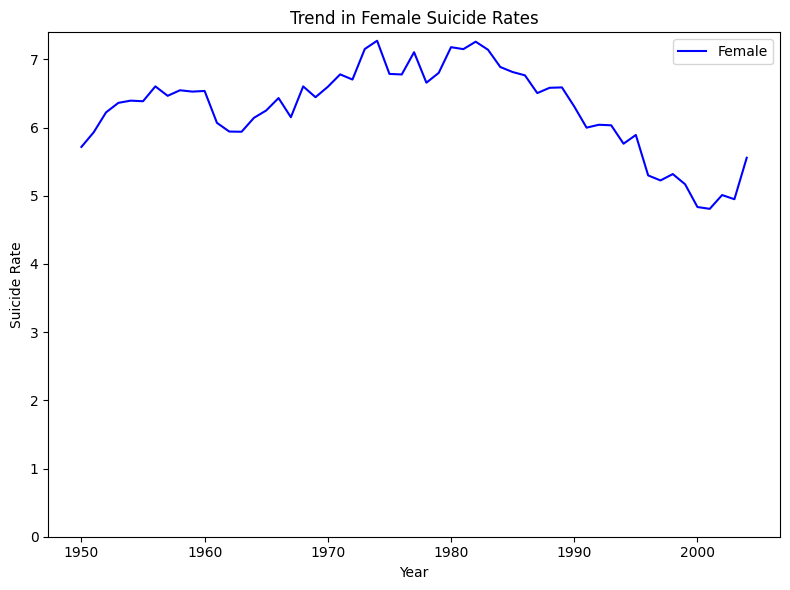

In [ ]:
# Group data by year and calculate mean suicide rates for women
female_suicide_rates_by_year = suicide_rates.groupby('Year')['Female suicide rate (WHO (2005))'].mean()

# Plot both trend lines on the same graph
plt.figure(figsize=(8, 6))
plt.plot(female_suicide_rates_by_year.index, female_suicide_rates_by_year, color='blue', label='Female')
plt.title('Trend in Female Suicide Rates')
plt.xlabel('Year')
plt.ylabel('Suicide Rate')
plt.legend()

# Set the y-axis to start from 0
plt.ylim(0)

plt.tight_layout()
plt.show()

Observation:
* Female suicide rates exhibited a steady increase from 1950 to the early 1970s, reaching a peak before experiencing a slight decline around 1972. Subsequently, there were fluctuations in rates until the early 1980s, followed by a notable decrease leading into the mid to late 1990s and the early 2000s, when rates reached their lowest levels.

### Trend in male suicide rates

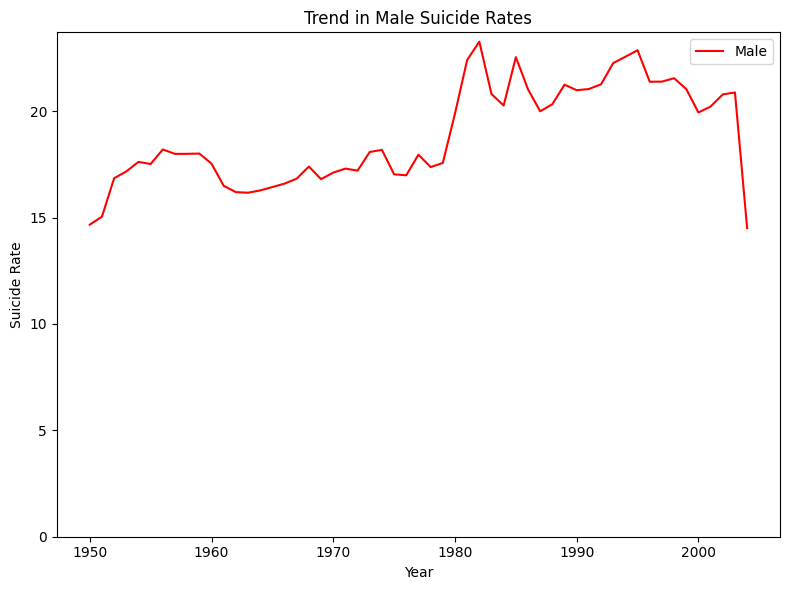

In [ ]:
# Group data by year and calculate mean suicide rates for men
male_suicide_rates_by_year = suicide_rates.groupby('Year')['Male suicide rate (WHO (2005))'].mean()

# Plot both trend lines on the same graph
plt.figure(figsize=(8, 6))
plt.plot(male_suicide_rates_by_year.index, male_suicide_rates_by_year, color='red', label='Male')
plt.title('Trend in Male Suicide Rates')
plt.xlabel('Year')
plt.ylabel('Suicide Rate')
plt.legend()

# Set the y-axis to start from 0
plt.ylim(0)

plt.tight_layout()
plt.show()

Observation:
* There was an increase in male suicides between 1950 to 1960, exhibited by an upward trend in male suicide rates within that period, followed by a steep decline. Afterward, there was a steady increase until approximately 1980. Subsequently, there was a sharp increase, with notable fluctuations until the early 2000s, when rates experienced a sharp decline.

### Overall trend for both genders

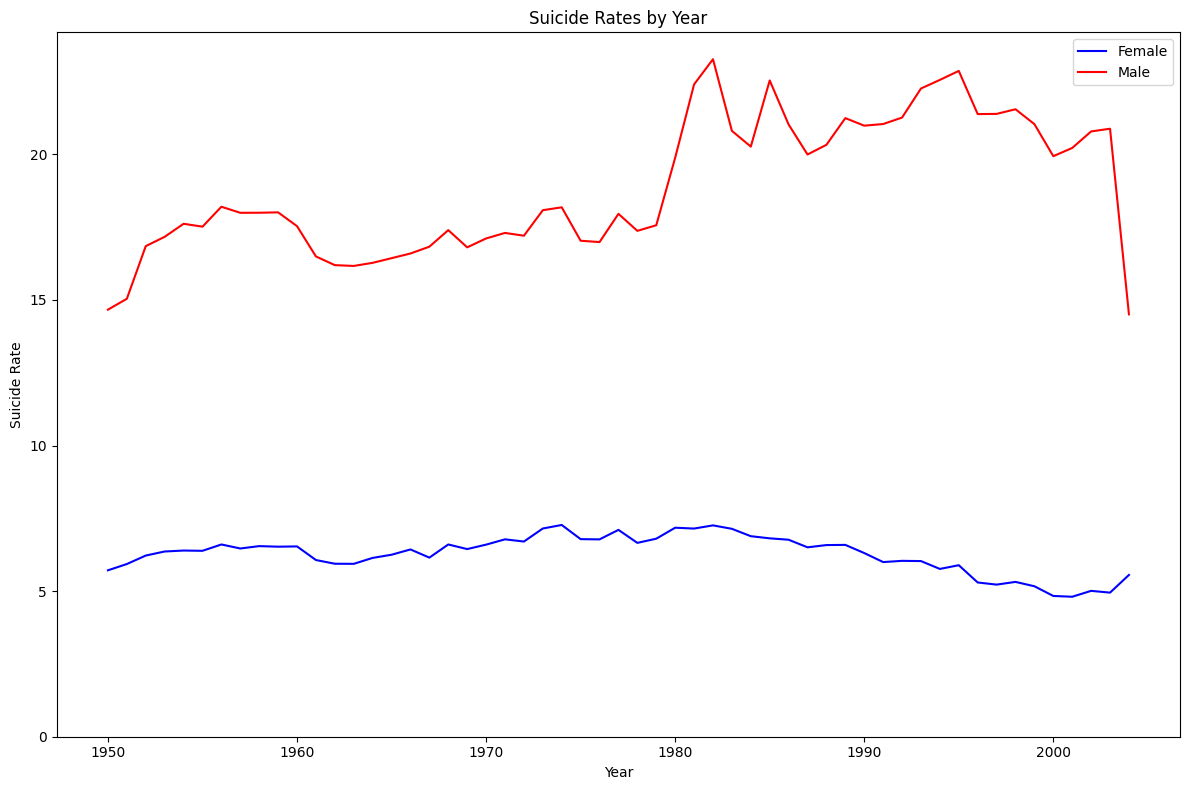

In [ ]:
# Group data by year and calculate mean suicide rates for both genders
suicide_rates_by_year = suicide_rates.groupby('Year').mean(numeric_only=True)

# Plot both trend lines on the same graph
plt.figure(figsize=(12, 8))
plt.plot(suicide_rates_by_year.index, suicide_rates_by_year['Female suicide rate (WHO (2005))'], color='blue', label='Female')
plt.plot(suicide_rates_by_year.index, suicide_rates_by_year['Male suicide rate (WHO (2005))'], color='red', label='Male')
plt.title('Suicide Rates by Year')
plt.xlabel('Year')
plt.ylabel('Suicide Rate')
plt.legend()

# Set the y-axis to start from 0
plt.ylim(0)

plt.tight_layout()
plt.show()

Observation:

* Generally, suicide rates increased from 1950 to the 1970s and peaked in the early 1980s. Since the mid-1980s into the 2000s, suicide rates decreased.
* Consistent with earlier findings, male suicide rates are upto three times higher than female suicide rates.

## Analysis by year

Analyzing suicide rates by year is crucial for pinpointing specific events or trends that might have influenced suicide prevalence during those periods, allowing for the correlation of high or low suicide rates with significant historical events, economic changes, policy implementations, or societal shifts. Identifying the years with the highest and lowest suicide rates across both genders will facilitate a deeper understanding of the underlying factors driving these fluctuations.

### Years with the highest suicide rates

In [ ]:
# Sort the data by mean female suicide rates in descending order
female_suicide_rates_by_year_sorted = female_suicide_rates_by_year.sort_values(ascending=False)

# Get the top 10 years with the highest female suicide rates
top_10_highest = female_suicide_rates_by_year_sorted.head(10)

# Print the results
print("Top 10 years with the highest female suicide rates:")
print(top_10_highest)


Top 10 years with the highest female suicide rates:
Year
1974    7.272507
1982    7.258665
1980    7.178175
1973    7.151515
1981    7.149359
1983    7.140494
1977    7.104166
1984    6.887218
1985    6.813580
1979    6.801265
Name: Female suicide rate (WHO (2005)), dtype: float64


In [ ]:
# Sort the data by mean male suicide rates in descending order
male_suicide_rates_by_year_sorted = male_suicide_rates_by_year.sort_values(ascending=False)

# Get the top 10 years with the highest male suicide rates
top_10_highest = male_suicide_rates_by_year_sorted.head(10)

# Print the results
print("Top 10 years with the highest male suicide rates:")
print(top_10_highest)

Top 10 years with the highest male suicide rates:
Year
1982    23.269213
1995    22.867205
1994    22.558568
1985    22.539587
1981    22.403925
1993    22.263061
1998    21.550285
1997    21.391201
1996    21.384684
1992    21.264800
Name: Male suicide rate (WHO (2005)), dtype: float64


Observation:

* The highest female suicide rates were observed between the early 1970s and later between the late 70s into the early to mid 80s. Specifically, the most female suicides occurred in 1974 followed by 1982. Conversely, the highest incidences of male suicides were witnessed in the early 1980s between 1982 to 1985, then from 1992 to 1998, with the highest occurrences in 1982.

* These elevated suicide rates during the mid-1970s, 1980s, and the 1990s may be attributed, in part, to global recessions experienced in 1975, 1982, and 1991. These recessions were characterized by extended periods of stagflation, low output growth, high inflation, and elevated unemployment rates. The link between economic downturns and increased suicide rates is well-documented. The stressful environment following economic recessions, marked by rising unemployment and job insecurity, contributes significantly to psychological distress. This distress, compounded by financial crises, can escalate the prevalence of major depressive and anxiety disorders, potentially leading to higher suicide rates over time. Notably, these effects persist beyond the immediate crisis period, highlighting the lasting impact of economic downturns on mental health and suicide rates

### Years with the lowest suicide rates

In [ ]:
# Sort the data by mean female suicide rates in ascending order
female_suicide_rates_by_year_sorted = female_suicide_rates_by_year.sort_values(ascending=True)

# Get the top 10 years with the lowest female suicide rates
top_10_lowest = female_suicide_rates_by_year_sorted.head(10)

# Print the results
print("Top 10 years with the lowest female suicide rates:")
print(top_10_lowest)

Top 10 years with the lowest female suicide rates:
Year
2001    4.807660
2000    4.834220
2003    4.948839
2002    5.009908
1999    5.167483
1997    5.224144
1996    5.297519
1998    5.317515
2004    5.556619
1950    5.715680
Name: Female suicide rate (WHO (2005)), dtype: float64


In [ ]:
# Sort the data by mean male suicide rates in ascending order
male_suicide_rates_by_year_sorted = male_suicide_rates_by_year.sort_values(ascending=True)

# Get the top 10 years with the lowest male suicide rates
top_10_lowest = male_suicide_rates_by_year_sorted.head(10)

# Print the results
print("Top 10 years with the lowest male suicide rates:")
print(top_10_lowest)

Top 10 years with the lowest male suicide rates:
Year
2004    14.506137
1950    14.667237
1951    15.042206
1963    16.168954
1962    16.196443
1964    16.276015
1965    16.435765
1961    16.494860
1966    16.596561
1969    16.807367
Name: Male suicide rate (WHO (2005)), dtype: float64


Observation:
* The years 2001, 2000, and 2003 had the lowest female suicide rates, with rates ranging from approximately 4.8 to 5.0 per 100,000 population. Similarly,  the early 2000s (2004) show the lowest male suicide rates within the period, followed by the early 1950s and 60s.

* The early 2000s (2001-2004) consistently appear among the years with the lowest suicide rates among both men and women, indicating a potential positive trend or improvement in mental health and suicide prevention efforts during this period as well as positive economic trends in the global economy with lower incidences of economic downturns, unemployment and finacial crises.

### Analysis by country

Analyzing suicide rates by country is essential for uncovering geographical variations and identifying factors that may contribute to differences in suicide prevalence among nations. Identifying countries with the highest and lowest suicide rates provides insights into the correlation between country-specific factors such as socio-economic conditions, cultural norms and attitudes towards mental health, healthcare accessibility and quality, among others, and mental health outcomes.

#### Countries with the highest suicide rates

In [ ]:
# Group data by country and calculate mean female suicide rates
female_suicide_rates_by_country = suicide_rates.groupby('Entity')['Female suicide rate (WHO (2005))'].mean().reset_index()

# Sort the data by mean female suicide rates in descending order
sorted_female_suicide_rates_by_country = female_suicide_rates_by_country.sort_values(by='Female suicide rate (WHO (2005))', ascending=False)

# Select the top countries with the highest mean female suicide rates
highest_female_suicide_rates_by_country = sorted_female_suicide_rates_by_country.head(10)

# Display the top countries
print("Top 10 countries with the highest mean female suicide rates:")
print(highest_female_suicide_rates_by_country)


Top 10 countries with the highest mean female suicide rates:
           Entity  Female suicide rate (WHO (2005))
156       Somalia                         26.972969
91           Laos                         23.723370
72         Guyana                         21.247286
103      Maldives                         19.889219
34          China                         18.021471
75        Hungary                         15.460148
51   East Germany                         15.067797
12     Bangladesh                         14.392731
77          India                         14.306442
85          Japan                         13.125696


Observation:

* Somalia has the highest female suicide rate among the top 10 countries. This may be attributed to gender-based violence and discrimination that women in Somalia are subjected to including intimate partner violence, sexual violence and abuse, early and forced marriages, female genital mutilation, lack of education and limited economic freedom, among others. The situation extends to Laos, Maldives and Guyana where women are subject to various manifestations of gender inequality and violence.

* China ranking among the countries with the highest female suicide rates ...

* The high female suicide rates in Japan might have been a result of the Asian financial crisis experienced in the mid to late 1990s.

In [ ]:
# Group data by country and calculate mean male suicide rates
male_suicide_rates_by_country = suicide_rates.groupby('Entity')['Male suicide rate (WHO (2005))'].mean().reset_index()

# Sort the data by mean male suicide rates in descending order
sorted_male_suicide_rates_by_country = male_suicide_rates_by_country.sort_values(by='Male suicide rate (WHO (2005))', ascending=False)

# Select the top countries with the highest mean male suicide rates
highest_male_suicide_rates_by_country = sorted_male_suicide_rates_by_country.head(10)

# Display the top countries
print("Top 10 countries with the highest mean male suicide rates:")
print(highest_male_suicide_rates_by_country)

Top 10 countries with the highest mean male suicide rates:
         Entity  Male suicide rate (WHO (2005))
97    Lithuania                       62.980662
139      Russia                       55.434513
72       Guyana                       50.072697
57      Estonia                       49.313028
92       Latvia                       48.927518
75      Hungary                       46.718326
14      Belarus                       46.234002
87   Kazakhstan                       44.463585
154    Slovenia                       42.190554
178        USSR                       39.655779


Observation:
* The top 10 countries with the highest mean male suicide rates are predominantly from Eastern Europe and the former Soviet Union, with Lithuania, Russia, and Guyana leading in male suicide rates.

* Notably, all these countries with the exception of Guyana and Hungary are former Soviet states. This correlation highlights a potential link between historical events and contemporary mental health challenges. The dissolution of the Soviet Union in the early 1990s ushered in a period of profound social and economic upheaval across the region. The resulting social instability, economic hardships, and political changes had far-reaching effects, including on mental health. Research has indicated that the socio-economic disruptions caused by the USSR breakup contributed significantly to increased suicide prevalence in the former Soviet republics. The rapid transition from a centralized economy to market-based systems, along with the dismantling of social support structures, unemployment, poverty, and uncertainty, all created a stressful environment that may have increased instances of post traumatic stress disorder and depression and impacted mental well-being.

* This underscores a regional trend where countries with historical ties or shared socio-economic factors exhibit higher rates of suicide, indicating potential cultural, social, or economic influences on mental health outcomes in these regions.

#### Countries with the lowest suicide rates

In [ ]:
# Sort the data by mean female suicide rates in ascending order
sorted_female_suicide_rates_by_country = female_suicide_rates_by_country.sort_values(by='Female suicide rate (WHO (2005))', ascending=True)

# Select the top countries with the lowest mean female suicide rates
lowest_female_suicide_rates_by_country = sorted_female_suicide_rates_by_country.head(10)

# Display the top countries
print("Top 10 countries with the lowest mean female suicide rates:")
print(lowest_female_suicide_rates_by_country)

Top 10 countries with the lowest mean female suicide rates:
                   Entity  Female suicide rate (WHO (2005))
86                 Jordan                          0.107824
150            Seychelles                          0.181349
53                  Egypt                          0.231432
181  United Arab Emirates                          0.274215
43                 Cyprus                          0.275474
68                Grenada                          0.343973
23                 Brunei                          0.375145
166                 Syria                          0.446933
127                  Oman                          0.510550
13               Barbados                          0.706948


In [ ]:
# Sort the data by mean male suicide rates in ascending order
sorted_male_suicide_rates_by_country = male_suicide_rates_by_country.sort_values(by='Male suicide rate (WHO (2005))', ascending=True)

# Select the top countries with the lowest mean male suicide rates
lowest_male_suicide_rates_by_country = sorted_male_suicide_rates_by_country.head(10)

# Display the top countries
print("Top 10 countries with the lowest mean male suicide rates:")
print(lowest_male_suicide_rates_by_country)

Top 10 countries with the lowest mean male suicide rates:
                   Entity  Male suicide rate (WHO (2005))
86                 Jordan                        0.283630
53                  Egypt                        0.356142
166                 Syria                        0.597566
43                 Cyprus                        0.980029
89                 Kuwait                        1.142558
181  United Arab Emirates                        1.806055
73                  Haiti                        2.085222
114               Morocco                        2.114464
133                  Peru                        2.261821
23                 Brunei                        2.314273


Observation:

* Jordan, Egypt, United Arab Emirates, Cyprus, Syria, and Brunei feature on both lists with the lowest female and male suicide rates. Particularly noteworthy is Jordan, with the lowest suicide rates among both women (0.1 per 100,000) and men (0.28 per 100,000).

* A notable trend among these countries is their predominantly Muslim population. Research indicates that religion, especially in areas with higher religious homogeneity like Muslim-majority countries, serves as a protective factor against suicide. Islam, in particular, holds the lowest permissiveness level towards suicide among major religions globally.

* Suicide rates in most Muslim-majority countries consistently remain lower than the global average. This trend is attributed to both religious influences and the integration of Islamic principles into governance and social systems in these countries. Additionally, the stigma surrounding suicide in Muslim countries may contribute to underreporting, leading to lower recorded suicide rates.

* This religious influence and cultural attitude towards suicide might explain the observed trend of lower suicide rates in these countries.


### Bivariate analysis

 It is widely recognized that male suicide rates tend to be significantly higher than female suicide rates, often three to five times higher. This section delves deeper into this gender disparity in suicide rates, examining how it manifests across different countries with varying levels of suicide prevalence among men and women. This comparative analysis will not only shed light on the magnitude of the gender gap in suicide rates but also provide valuable insights into the factors contributing to this disparity and the potential implications for suicide prevention strategies.

#### Comparison of male and female suicide rates in countries with the highest female suicide rates

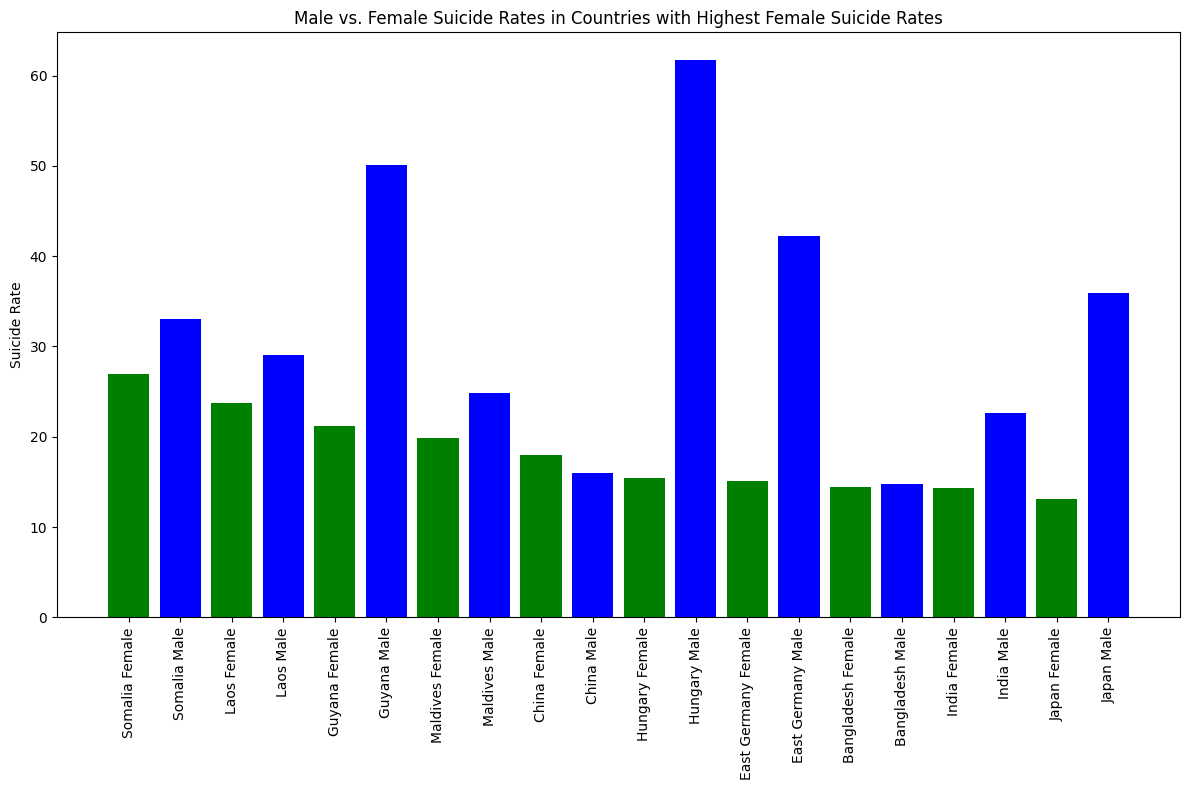

In [ ]:
# Merge highest female suicide rates with male suicide rates
merged_rates = pd.merge(highest_female_suicide_rates_by_country, male_suicide_rates, on='Entity', suffixes=('_female', '_male'))

# Plotting
plt.figure(figsize=(12, 8))
for index, row in merged_rates.iterrows():
    plt.bar([row['Entity'] + ' Female', row['Entity'] + ' Male'], [row['Female suicide rate (WHO (2005))'], row['Male suicide rate (WHO (2005))']], color=['green', 'blue'])

plt.title('Male vs. Female Suicide Rates in Countries with Highest Female Suicide Rates')
plt.ylabel('Suicide Rate')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


#### Comparison of male and female suicide rates in countries with the lowest female suicide rates

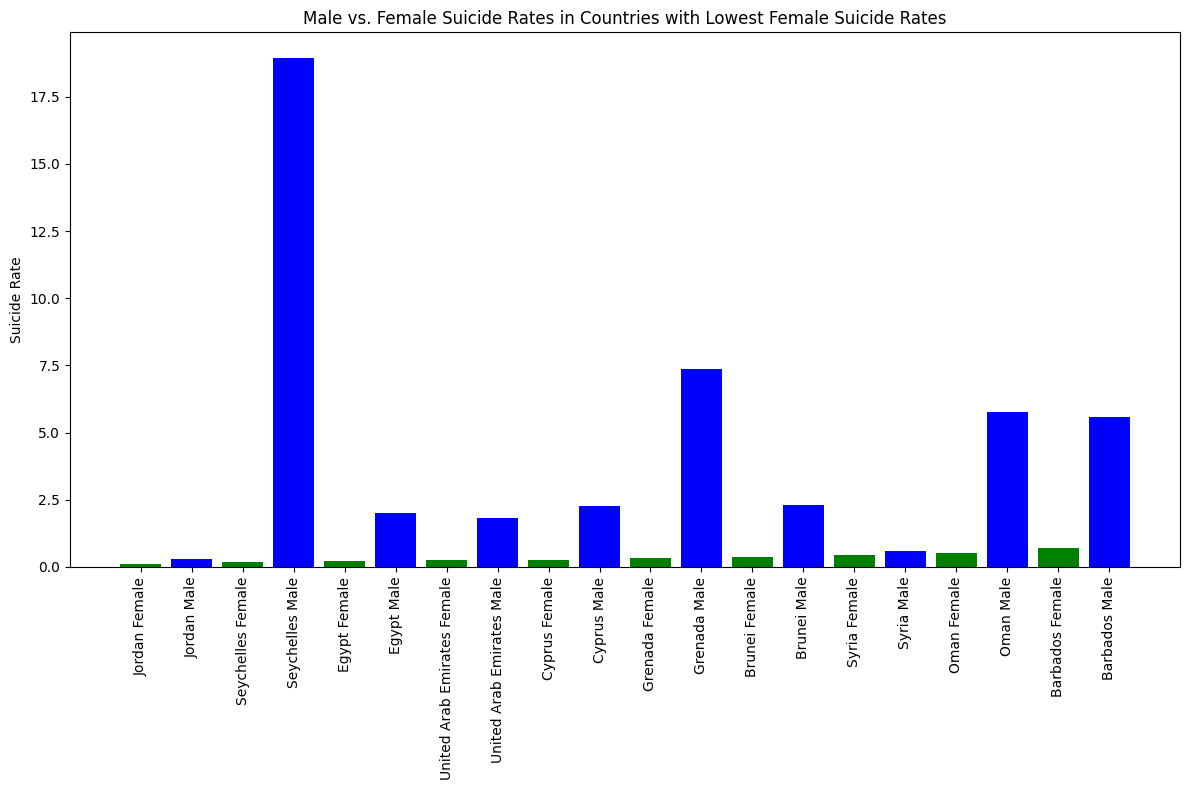

In [ ]:
# Merge highest female suicide rates with male suicide rates
merged_rates = pd.merge(lowest_female_suicide_rates_by_country, male_suicide_rates, on='Entity', suffixes=('_female', '_male'))

# Plotting
plt.figure(figsize=(12, 8))
for index, row in merged_rates.iterrows():
    plt.bar([row['Entity'] + ' Female', row['Entity'] + ' Male'], [row['Female suicide rate (WHO (2005))'], row['Male suicide rate (WHO (2005))']], color=['green', 'blue'])

plt.title('Male vs. Female Suicide Rates in Countries with Lowest Female Suicide Rates')
plt.ylabel('Suicide Rate')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### Distribution of female suicide rates across the years

In [ ]:
# plt.figure(figsize = (12,10))
# sns.boxplot(x='Year', y='Female suicide rate (WHO (2005))', data=female_suicide_rates)
# plt.xlabel('Year')
# plt.ylabel('Suicide Rate')
# plt.title('Distribution of Female Suicide Rates by Year')
# plt.xticks(rotation=90)
# plt.show()
# Merge lowest male suicide rates with female suicide rates
merged_rates = pd.merge(lowest_male_suicide_rates_by_country, female_suicide_rates, on='Entity', suffixes=('_female', '_male'))


#### Comparison of male and female suicide rates in countries with the highest male suicide rates

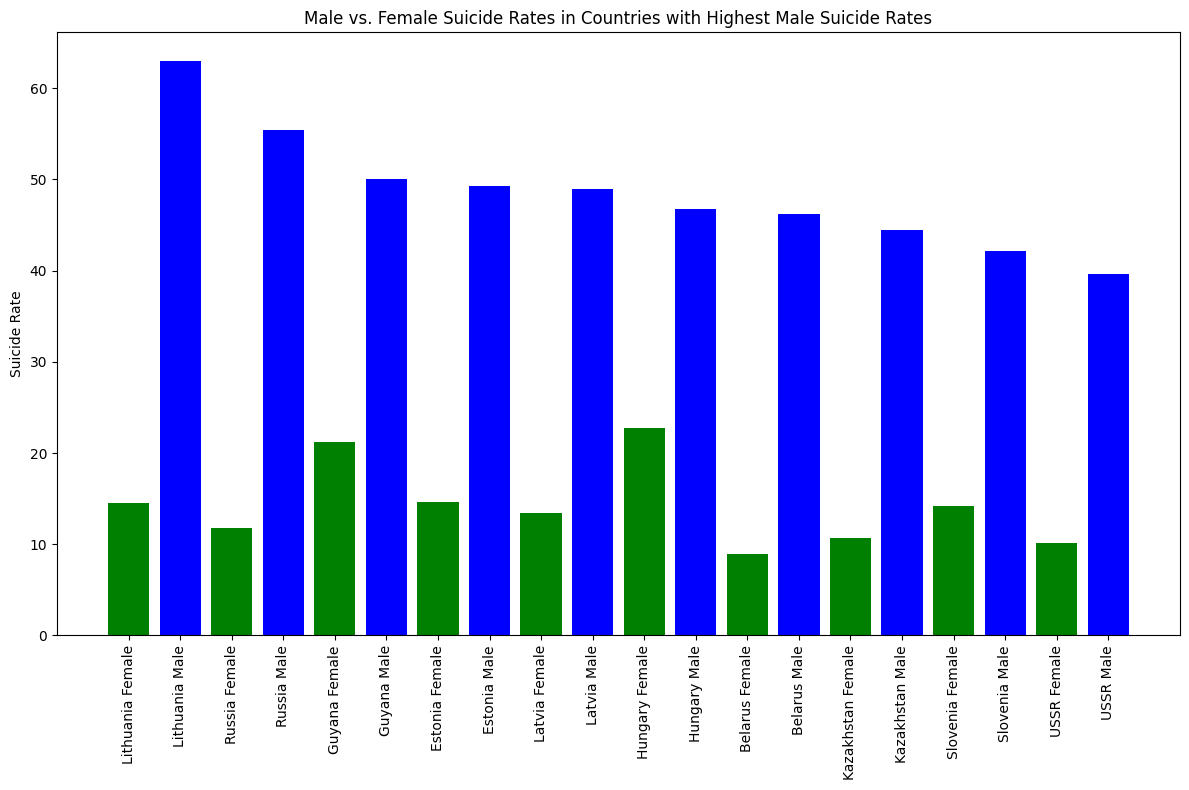

In [ ]:
# Merge highest female suicide rates with male suicide rates
merged_rates = pd.merge(highest_male_suicide_rates_by_country, female_suicide_rates, on='Entity', suffixes=('_female', '_male'))

# Plotting
plt.figure(figsize=(12, 8))
for index, row in merged_rates.iterrows():
    plt.bar([row['Entity'] + ' Female', row['Entity'] + ' Male'], [row['Female suicide rate (WHO (2005))'], row['Male suicide rate (WHO (2005))']], color=['green', 'blue'])

plt.title('Male vs. Female Suicide Rates in Countries with Highest Male Suicide Rates')
plt.ylabel('Suicide Rate')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

#### Comparison of male and female suicide rates in countries with the lowest male suicide rates

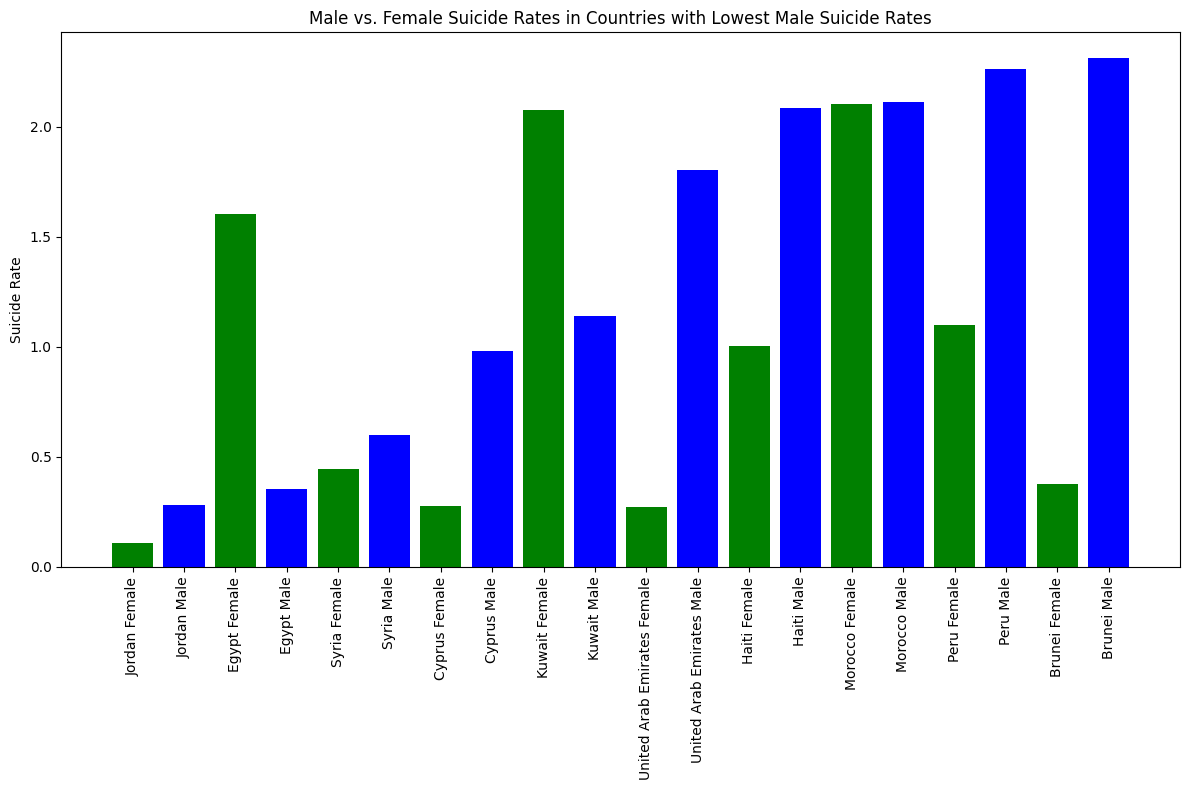

In [ ]:
# Merge lowest male suicide rates with female suicide rates
merged_rates = pd.merge(lowest_male_suicide_rates_by_country, female_suicide_rates, on='Entity', suffixes=('_female', '_male'))

# Plotting
plt.figure(figsize=(12, 8))
for index, row in merged_rates.iterrows():
    plt.bar([row['Entity'] + ' Female', row['Entity'] + ' Male'], [row['Female suicide rate (WHO (2005))'], row['Male suicide rate (WHO (2005))']], color=['green', 'blue'])

plt.title('Male vs. Female Suicide Rates in Countries with Lowest Male Suicide Rates')
plt.ylabel('Suicide Rate')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Findings

* Female suicide rates exhibited a consistent decline from the early 1980s to 2004. The peak of female suicide rates occurred in the early 1980s, followed by a notable decrease leading into the mid to late 1990s and the early 2000s, where rates reached their lowest levels.

* Somalia recorded the highest female suicide rate at 26.97 per 100,000 population, while Jordan recorded the lowest rate.

* Male suicide rates far surpassed female rates both in countries where the highest and lowest female suicide rates were recorded, nearly tripling them. This corroborates research highlighting that males are more inclined to suicide than females.

* Male suicide rates experienced a significant increase from 1980 to the early 2000s, followed by a sharp decline.

* Lithuania exhibited the highest male suicide rate at approximately 62.98 per 100,000 population.

* Hungary stood out for having high suicide rates among both men and women. In contrast, Jordan had the lowest suicide rates among both genders.

## Conclusions

## Next steps